## Что делать если мало данных?

На практике у нас обычно достаточно мало данных. Что же нам делать в такой ситуации? 

Если мы работаем с картинками, мы можем искусственно увеличить количество данных различными трюками.

## Загружаем данные

Будем работать с конкурсом по распознаванию кошек\собак на картинках. Соревнование было на кеггле поэтому из тех статей можно подчерпнуть что-то ценное и взять данные.
`https://www.kaggle.com/c/dogs-vs-cats/data` 

Картинки в среднем качестве формата jpeg.
![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

Победитель получил более 95% точности. Мы возьмем 10% от всех данных, что использовались и посмотрим, что  у нас получится.

In [1]:
import keras
import os, shutil


C:\Users\vvsol\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# папка где лежат наши разархивированные данные все
original_dataset_dir = 'C:/Users/vvsol/Desktop/dataset/sem_3/kaggle_original_data'

# папка для маленького датасета.
base_dir = 'C:/Users/vvsol/Desktop/dataset/sem_3/cats_and_dogs_small'
os.mkdir(base_dir)

# пака для валидации и теста
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Проверяем сколько у нас получилось картинок для трейна, теста, валидации:

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [8]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [9]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [10]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [11]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [12]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


Отлично-у нас 2000 тысячи обучающая выборка, 1000 валидационная, 1000 тестовая. Выборка у нас сбалансированная(что тоже редкость, ну да ладно =))

## Собираем нейронную сеть

Собираем нашу сетку. У нас тут несколько сверток и MaxPolling. Также у нас каждая картинка это 150*150*3 тензор, т.к. у нас 3 цвета, в отличие от мниста. Последний слой у нас 1 нейрон с сигмоидальной активацией, т.к. у нас бинарная классификация, собака\кошка.



In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Получаем большое количество весов, но свертка пытается найти патерны, поэтому не так сильно переучивается как полносвязная сеть.

In [3]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing

На данном шаге нам нужно передать картинку в нашу сеть, считывая батчи с жесткого диска.
Для этого нам надо:

* Считать картинку.
* Декодировать картинку из jpeg в RGB.
* Конвертировать эту прелесть в тензоры.
* Отнормировать наши данные на отрезок 0-1.

В keras реализованы генераторы для всего этого дела, которые хорошо работают с картинками

In [4]:
# пака для валидации и теста
train_dir = 'cats_and_dogs_small/train/'
validation_dir = 'cats_and_dogs_small/validation/'
test_dir = 'cats_and_dogs_small/test/'


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Задаем нормировку
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # говорим, где у нас все лежит
        train_dir,
        # Говорим-сделай нам все картинку в наше разрешение
        target_size=(150, 150),
        batch_size=20,
        # Нужен бинарный таргет, для нашей моедил
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
# проверяем
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [20]:
# в фит уже передаем созданные генераторы, во всем остальном обучение индентично
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5796 - acc: 0.6895 - val_loss: 0.6207 - val_acc: 0.6540
Epoch 2/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5459 - acc: 0.7165 - val_loss: 0.5997 - val_acc: 0.6720
Epoch 3/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5177 - acc: 0.7405 - val_loss: 0.6577 - val_acc: 0.6640
Epoch 4/30
100/100 [==============================] - 6s 57ms/step - loss: 0.4956 - acc: 0.7555 - val_loss: 0.5789 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 6s 57ms/step - loss: 0.4681 - acc: 0.7795 - val_loss: 0.5941 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 6s 57ms/step - loss: 0.4427 - acc: 0.7975 - val_loss: 0.6917 - val_acc: 0.6630
Epoch 7/30
100/100 [==============================] - 6s 57ms/step - loss: 0.4230 - acc: 0.8065 - val_loss: 0.5608 - val_acc: 0.7240
Epoch 8/30
100/100 [==============================] - 6s 57ms/step - 

Хорошая практика всегда сохранять модели, так как обучение уже не моментальное и при втором прогоне мы можем получить другие результаты

In [21]:
model.save('cats_and_dogs_small_1.h5')

Нарисуем процесс обучения

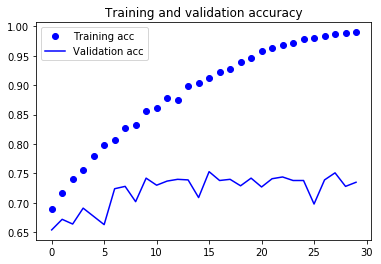

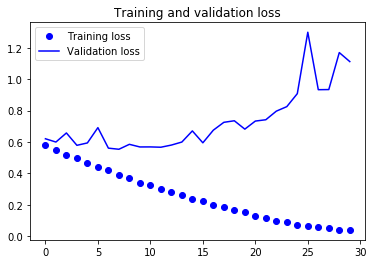

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

На вопрос-как же нам понять сложная ли наша сеть? Вот так =) Очевидное переобучение. Либо упрощать архитектуру, либо добавлять регуляризацию, либо добавить данных (чем мы займемся сейчас). Да, все способы не являются взаимоисключающими.

## Data augmentation

Мы можем попробовать увеличить наш объем данных видоизменяя картинки. Если мы сдвинет кота на пару пикселей или затемним-он все также останется котом, не так ли? В keras есть готове решение, помогающие подвигать картинки.

In [6]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Приведем несколько опций для данной функции.

* `rotation_range`  значение в градусах (0-180), диапазон, в пределах которого произвольно вращаются изображения;
* `width_shift` и `height_shift` это диапазоны (в долях от общей ширины или высоты), в пределах которых можно произвольно переводить изображения по вертикали или горизонтали;
* `rescale` это коэффициент скалирования, на который мы умножаем наши данные перед каждой модернизацией;
* `shear_range` диапазон для рандомных сдвигов
* `zoom_range` для случайного масштабирования внутри фотографий
* `horizontal_flip` для переворачивания половины изображения по горизонтали
* `fill_mode` стратегия для заполнения вновь появившихся пикселей


Давайте посмотрим на полученные картинки

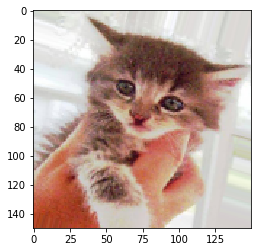

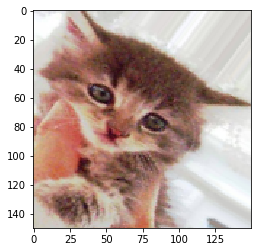

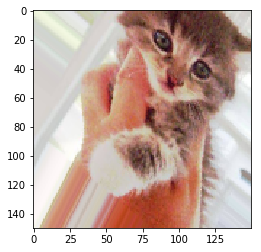

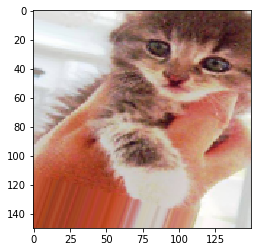

In [25]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# возьмем картинку повертеть
img_path = fnames[3]

# Считаем и заресайзим
img = image.load_img(img_path, target_size=(150, 150))

# На нужен нампай
x = image.img_to_array(img)

# Ну и массив из одной картинки
x = x.reshape((1,) + x.shape)

# .flow позволяет нам вертеть картинками как мы только можем
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Повторим процедуру обучения модели, но уже на немного преобразованных данных. Еще и добавим DropOut для надежности борьбы с переобучением .

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# над тестовыми данными не издеваемся :)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 22s 225ms/step - loss: 0.6886 - acc: 0.5297 - val_loss: 0.6703 - val_acc: 0.5895
Epoch 2/30
100/100 [==============================] - 20s 203ms/step - loss: 0.6732 - acc: 0.5756 - val_loss: 0.6530 - val_acc: 0.6161
Epoch 3/30
100/100 [==============================] - 20s 202ms/step - loss: 0.6482 - acc: 0.6178 - val_loss: 0.6405 - val_acc: 0.6187
Epoch 4/30
100/100 [==============================] - 20s 203ms/step - loss: 0.6271 - acc: 0.6400 - val_loss: 0.6087 - val_acc: 0.6593
Epoch 5/30
100/100 [==============================] - 20s 201ms/step - loss: 0.6191 - acc: 0.6544 - val_loss: 0.6065 - val_acc: 0.6447
Epoch 6/30
100/100 [==============================] - 22s 223ms/step - loss: 0.6003 - acc: 0.6688 - val_loss: 0.5786 - val_acc: 0.6846
Epoch 7/30
100/100 [==============================] - 20s 202ms/step - loss: 0.5933 - acc: 0.6788 - val_lo

Данных больше и логично, что обучение делается дольше. Нейронные сети вообще не про быстрое обучение, они про нужно больше мощностей =).Опять же сохраним полученные результаты.

In [41]:
model.save('cats_and_dogs_small_2.h5')

Построим теже графики, что и в предыдущем шаге.

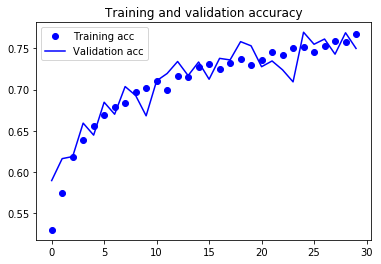

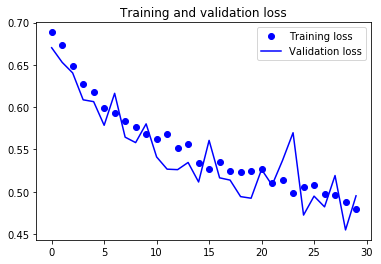

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Итого-модель еще явно можно дообучать, увеличив, например, число эпох. Мы уже получили улучшение в качестве используя, по сути, тот же набор данных, что и вначале.